In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import xarray as xr

### Below I'm extracting the data from the NetCDF file for one day, July 19, 2021, and collecting them into arrays and data frames.I'm soecifically interested in te CNR values and the atmospheric structures values. The CNR will be use to calculate the PBL heigth via a gradient ascent of the STD values of each height per each hour. These values will be compared with the values the Lidar has as the actual PBL height for that hour.

In [3]:
path_day = "/Users/jenifervivar/Desktop/NOAA_Spring2022/LIDAR_JUN17-30_2021/FXD20210719/"
time_day = np.array([])
cnr_day = np.array([])
relat_beta_day = np.array([])
spectral_width_day = np.array([])
atm_structures = np.array([])
for file in sorted(os.listdir(path_day)):
    #skips dummy files
    if file != '.DS_Store':
        data = nc.Dataset(path_day + file , mode ='r')#this will open the netCDF data
        
        #gets the name of the group that contains the data as it changes in every file
        sweep_file = data[list(data.groups.keys())[1]]
        
        #THE [:] IS NEEDED TO GET ALL THE VALUES
        dumm_cnr = sweep_file.variables['cnr'][:]
        dumm_time= sweep_file.variables['time'][:]
        dumm_rela_beta = sweep_file.variables["relative_beta"][:]
        dumm_spectral = sweep_file.variables["doppler_spectrum_width"][:]
        dum_struct = sweep_file.variables["atmospherical_structures_type"][:]
        #appending all the values into one numpy array
        cnr_day = np.append(cnr_day, dumm_cnr)
        time_day =np.append(time_day,dumm_time)
        relat_beta_day= np.append(relat_beta_day, dumm_rela_beta)
        spectral_width_day = np.append(spectral_width_day, dumm_spectral)
        atm_structures  = np.append(atm_structures, dum_struct)
#converts time from epoch to current local time
time =(pd.to_datetime(time_day, unit = 's'))
columns = (np.array([i for i in range(200, 5200, 100)])).astype(str)
#tranforming the arrays into a dataframe
df_cnr = pd.DataFrame(np.flip((cnr_day)).reshape(int(len(cnr_day)/50),50), columns = np.flip(columns), index = np.flip(time.round('S')))
df_beta = pd.DataFrame(np.flip((relat_beta_day)).reshape(int(len(cnr_day)/50),50), columns = np.flip(columns), index = np.flip(time.round('S')))
df_spectralWidth = pd.DataFrame(np.flip((spectral_width_day)).reshape(int(len(cnr_day)/50),50), columns = np.flip(columns), index = np.flip(time.round('S')))

In [4]:
df_cnr_cop = df_cnr.reset_index()
#df_cnr_cop.head()

here I'm only interedted in the flag value 30 as that indcated that the mixed layer is present

In [10]:
df_structures = pd.DataFrame(np.flip((atm_structures )).reshape(int(len(atm_structures)/50),50), columns = np.flip(columns), index = np.flip(time.round('S')))
df_structures.head()

,5100,5000,4900,4800,4700,4600,4500,4400,4300,4200,...,1100,1000,900,800,700,600,500,400,300,200
2021-07-19 23:57:23,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
2021-07-19 23:57:22,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
2021-07-19 23:57:21,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
2021-07-19 23:57:20,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
2021-07-19 23:57:19,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0


In [22]:
df_struc = df_structures.reset_index()
df_struc

,index,5100,5000,4900,4800,4700,4600,4500,4400,4300,...,1100,1000,900,800,700,600,500,400,300,200
0,2021-07-19 23:57:23,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
1,2021-07-19 23:57:22,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
2,2021-07-19 23:57:21,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
3,2021-07-19 23:57:20,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
4,2021-07-19 23:57:19,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34636,2021-07-19 00:00:24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,200.0,220.0,220.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
34637,2021-07-19 00:00:23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,200.0,220.0,220.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
34638,2021-07-19 00:00:22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,200.0,220.0,220.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
34639,2021-07-19 00:00:21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,200.0,220.0,220.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0


In [ ]:
pblh_lidar = {}
i = 0
for col in df_struc.columns[1:]:
    df_new = df_struc[df_struc[col] == 30]
    pblLidar_series = df_new.resample("H", on='index')[col].median()
    
    if pblLidar_series.empty ==False:
        pblh_lidar[col] =[val for val in  pblLidar_series]
        print((pblh_lidar))


### Algorithm that calculates the current PBLH based on the STD of the CNR values per hour

In [11]:
def pbl_heigth(df):
    std_dict = {}
    i =  0
    for heigth in df.columns[1:]:
        std_dict[heigth] = []
        
        if df['index'][i].date() ==  pd.Timestamp("2021-07-19"):
            i+=1
            std_series = df.resample("H", on='index')[heigth].std()
           
            for std in std_series:
                std_dict[heigth].append(std)
        else:
            i+=1
    height_= 0
    stdMax = std_dict['5100'][0]
    pbl_h = {}
    for k in range(len(std_dict['5100'])):
        for h in std_dict.keys():
            current_std = std_dict[h][k]
            
            if current_std > stdMax:
                height_ = h
        pbl_h[k] = height_
        
    return pbl_h

In [45]:
pblh = pbl_heigth(df_cnr_cop)

/var/folders/sk/km6c1g654036cmvl40zycd0m0000gn/T/ipykernel_3511/4146142919.py:7: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if df['index'][i].date() ==  pd.Timestamp("2021-07-19"):


Text(0.5, 1.0, 'Mixing Heigth on July 19, 2021')

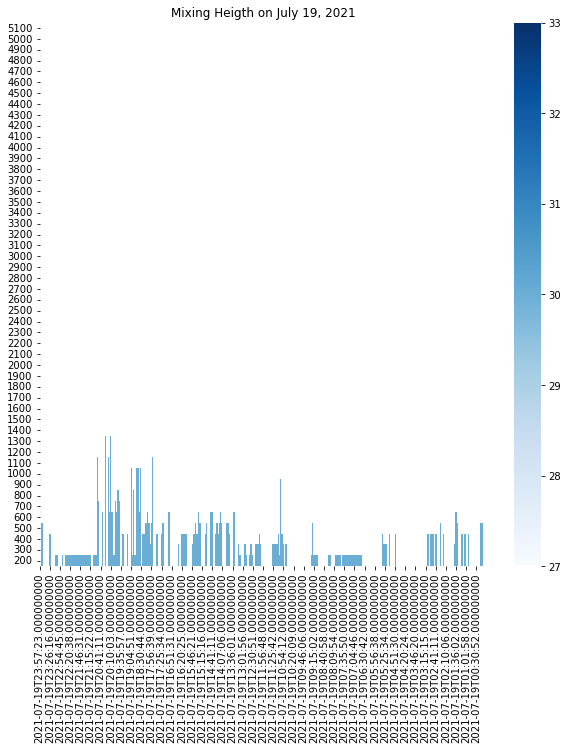

In [46]:
fig, ax =plt.subplots(figsize = (10,10))
sns.heatmap(df_structures[df_structures==30].transpose(), cmap = "Blues", label = "Atmospheric Structures July 19, 2021")
plt.title("Mixing Heigth on July 19, 2021")

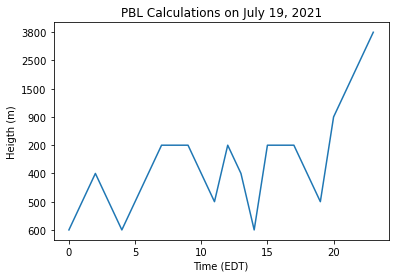

In [50]:

lists = sorted(pblh.items()) # sorted by key, return a list of tuple
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.title("PBL Calculations on July 19, 2021")
plt.ylabel("Heigth (m)")
plt.xlabel("Time (EDT)")
plt.show()